In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import keras

In [ ]:
num_classes = 10
input_shape = (32, 32, 3)

(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

print(f"X_train shape: {X_train.shape} - y_train shape: {y_train.shape}")
print(f"X_train shape: {X_train.shape} - y_test shape: {y_test.shape}")

170498071/170498071 [==============================] - 2s 0us/step
X_train shape: (50000, 32, 32, 3) - y_train shape: (50000, 1)
X_train shape: (50000, 32, 32, 3) - y_test shape: (10000, 1)


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.figure(figsize=(10,10))
for image in range(0,25):
    i=image
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    j=i+0
    data_plot = X_test[j]
    plt.imshow(data_plot)
    #plt.xlabel(str(subCategoryDict['SubClass'][y_test[j]]))
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

In [ ]:
def model():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Flatten())
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(10))
  model.summary()
  model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
  return model

In [ ]:
CNN = model()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_5 (Flatten)         (None, 1024)             

In [ ]:
history = CNN.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.9040 - accuracy: 0.3589 - val_loss: 1.4822 - val_accuracy: 0.4611
Epoch 2/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.3703 - accuracy: 0.5059 - val_loss: 1.2766 - val_accuracy: 0.5466
Epoch 3/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.2130 - accuracy: 0.5704 - val_loss: 1.1457 - val_accuracy: 0.6073
Epoch 4/10
1563/1563 [==============================] - 79s 51ms/step - loss: 1.1016 - accuracy: 0.6146 - val_loss: 1.0754 - val_accuracy: 0.6305
Epoch 5/10
1563/1563 [==============================] - 85s 54ms/step - loss: 1.0144 - accuracy: 0.6491 - val_loss: 1.1464 - val_accuracy: 0.6089
Epoch 6/10
1563/1563 [==============================] - 86s 55ms/step - loss: 0.9501 - accuracy: 0.6716 - val_loss: 1.0313 - val_accuracy: 0.6542
Epoch 7/10
1563/1563 [==============================] - 85s 54ms/step - loss: 0.8957 - accuracy: 0.6914 - val_loss: 1.0434 -

313/313 - 5s - loss: 1.1054 - accuracy: 0.6471 - 5s/epoch - 16ms/step


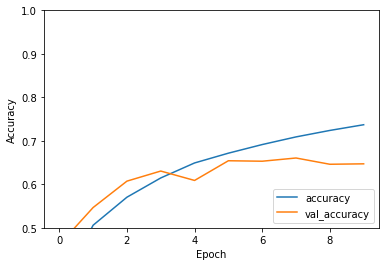

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = CNN.evaluate(X_test,  y_test, verbose=2)